In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#read file
df  = pd.read_csv("train.csv")

In [ ]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [ ]:
df.shape

(74111, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [ ]:
# Visualize distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.show()

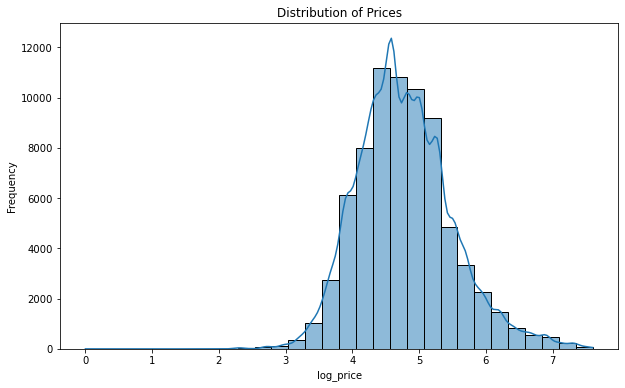

In [ ]:
# Visualize distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.show()

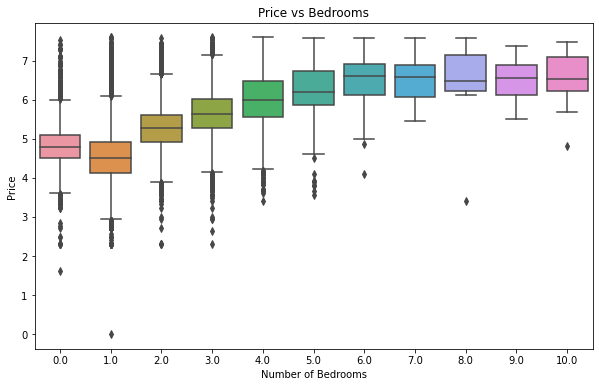

In [ ]:
# Visualize the relationship between price and number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='log_price', data=df)
plt.title('Price vs Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

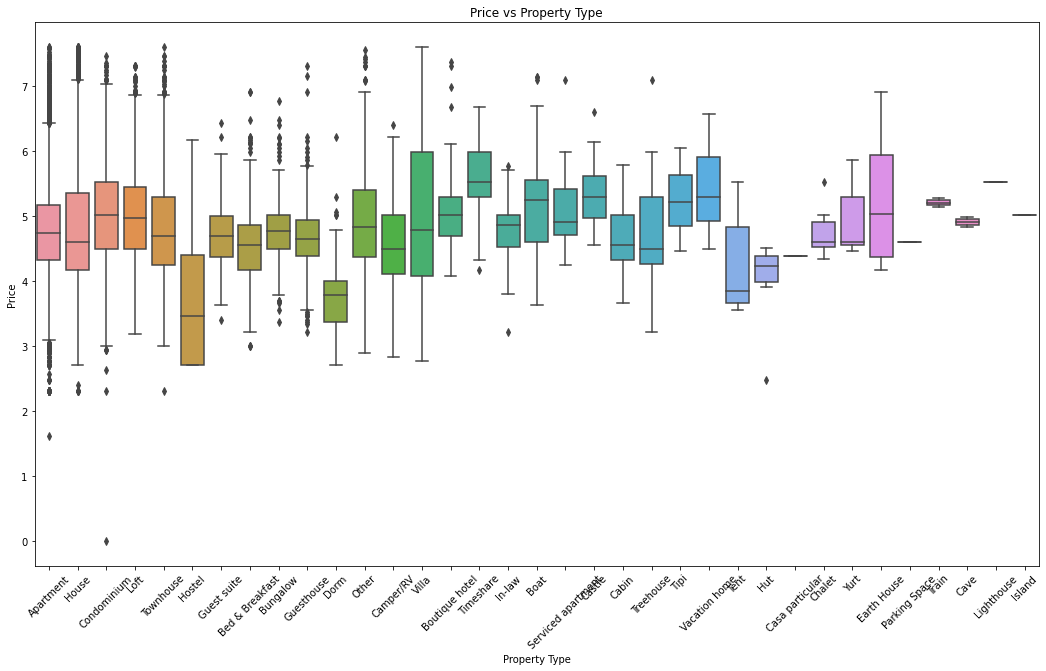

In [ ]:
# Visualize the relationship between price and property type
plt.figure(figsize=(18, 10))
sns.boxplot(x='property_type', y='log_price', data=df)
plt.title('Price vs Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

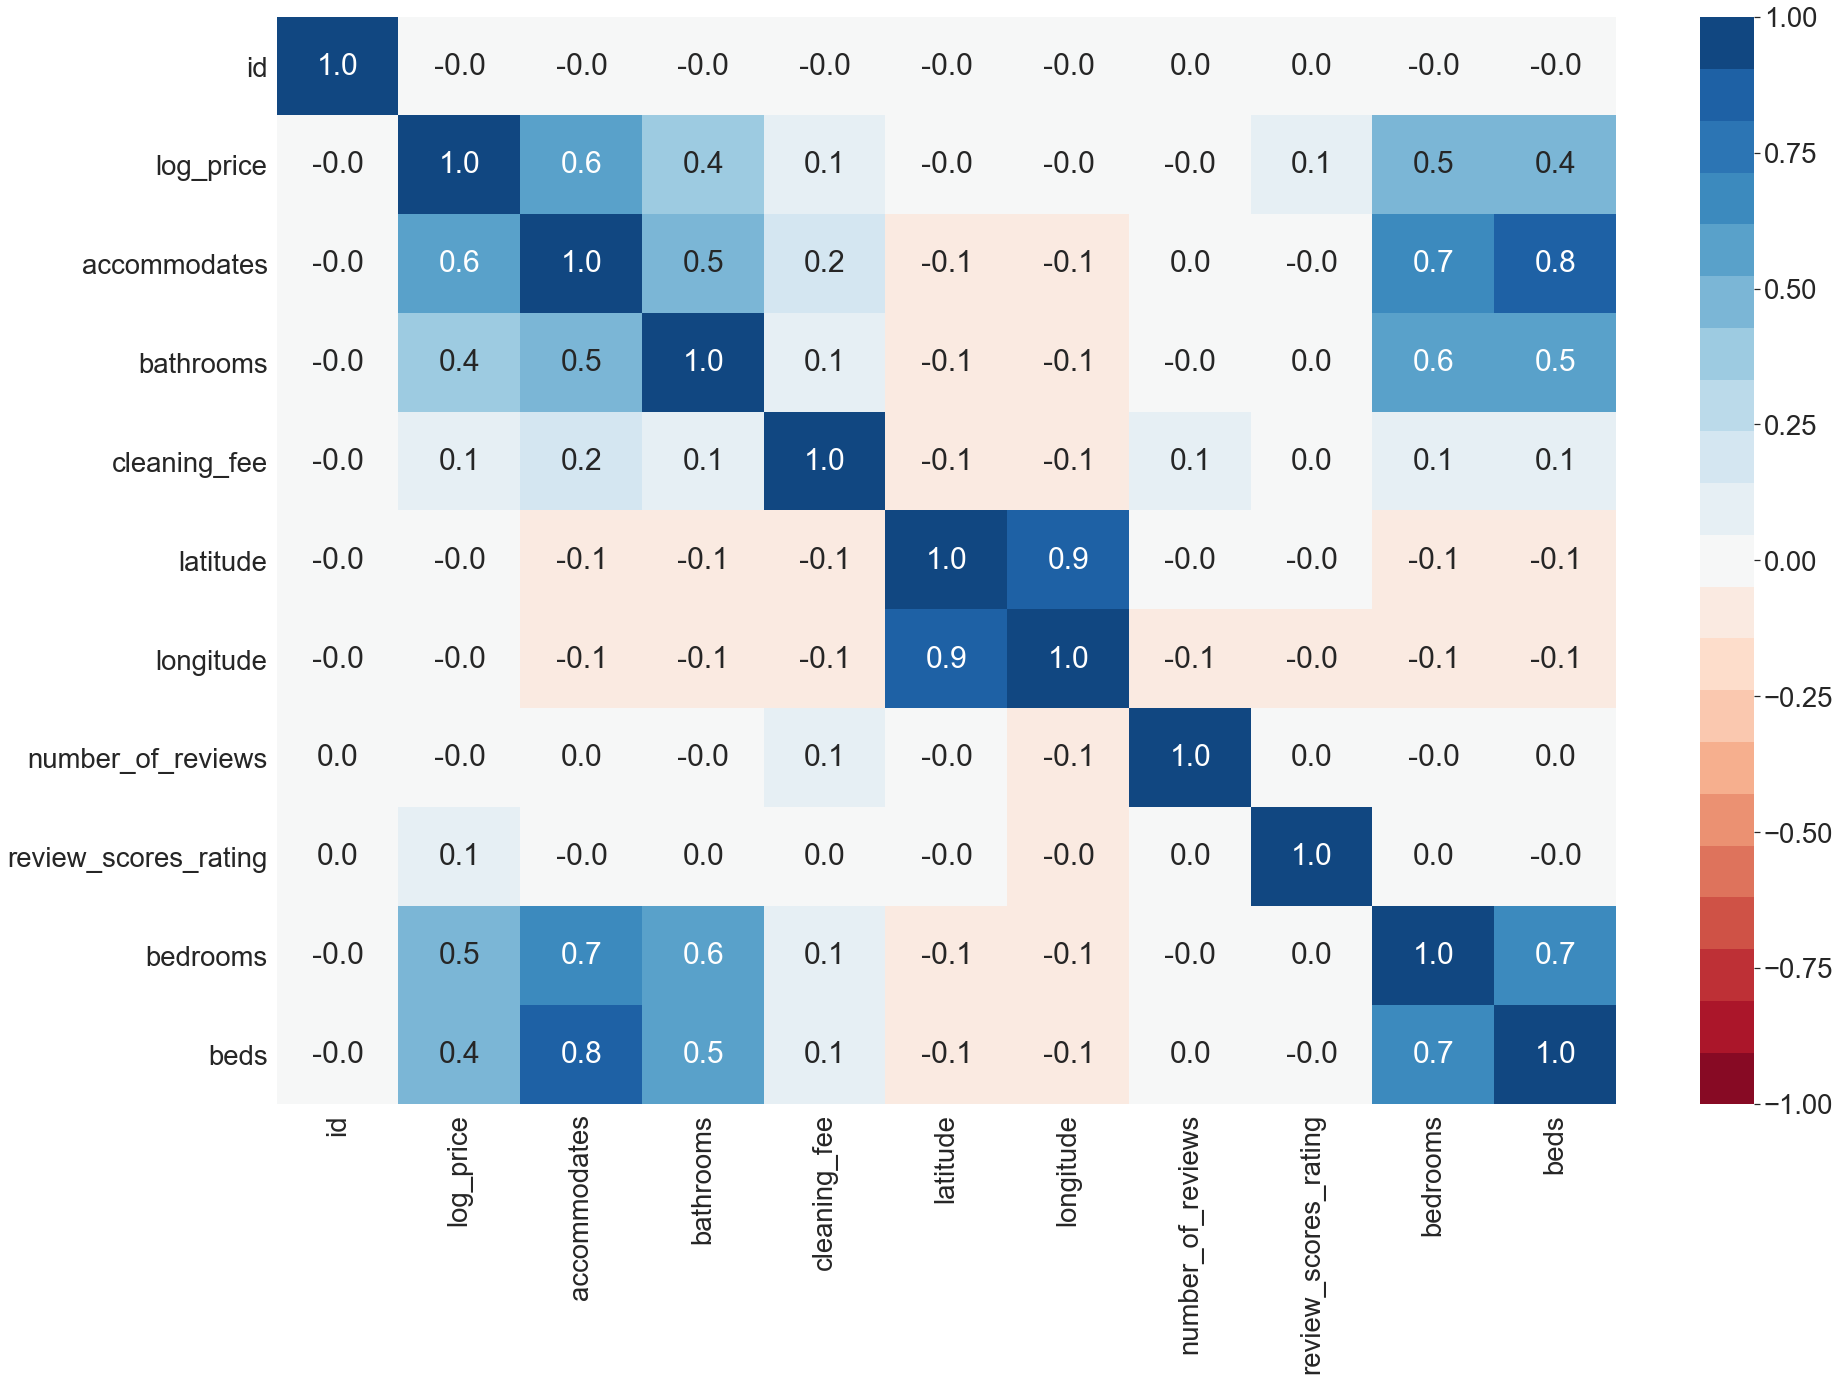

In [ ]:
# Visualize the correlation between numerical features
sns.set(font_scale=2.5)
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap=sns.color_palette('RdBu', 21), vmin=-1, vmax=1)

In [ ]:
# break the list of amenities in row data
amenities = {x for xs in row_data['amenities'].tolist() for x in xs}
amenities.remove('')
amenities.remove('translation missing: en.hosting_amenity_49')
amenities.remove('translation missing: en.hosting_amenity_50')
amenities = list(amenities)

amenities_df = pd.DataFrame(row_data['amenities'].apply(lambda x: [amenity in x for amenity in amenities]).tolist(),
                            columns=amenities, index=row_data.index)
amenities_df

In [ ]:
# the most popular amenities
amenities_df.astype('float').sum().sort_values(ascending = False)[:30].plot.bar()

In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("Airbnb_analysis").getOrCreate()
sc = spark.sparkContext

In [ ]:
from pyspark.sql.types import *

data_schema = [
               StructField('id', IntegerType(), True),
               StructField('log_price', DoubleType(), True),
               StructField('property_type', StringType(), True),
               StructField('room_type', StringType(), True),
               StructField('accommodates', IntegerType(), True),
               StructField('bathrooms', DoubleType(), True),
               StructField('bed_type', StringType(), True),
               StructField('cancellation_policy', StringType(), True),
               StructField('cleaning_fee', BooleanType(), True),
               StructField('city', StringType(), True),
               StructField('host_response_rate', IntegerType(), True),
               StructField('instant_bookable', BooleanType(), True),
               StructField('neighbourhood', StringType(), True),
               StructField('number_of_reviews', IntegerType(), True),
               StructField('review_scores_rating', DoubleType(), True),
               StructField('bedrooms', DoubleType(), True),
               StructField('beds', DoubleType(), True)

            ]
data_schema = StructType(fields=data_schema)

In [ ]:
data = spark.createDataFrame(row_data[['id', 'log_price', 'property_type', 'room_type', 'accommodates',
                                       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee',
                                       'city', 'host_response_rate', 'instant_bookable', 'neighbourhood',
                                       'number_of_reviews', 'review_scores_rating', 'bedrooms',
                                       'beds']], schema=data_schema)

In [ ]:
# city in dataset
data.select('city').distinct().collect()
# visualization of city in dataset
sns.set(rc = {'figure.figsize':(15,8)})

data.groupBy('city').count().toPandas().set_index('city').plot(kind = 'pie',y = 'count')

In [ ]:
# visualization of distribution of price for each city
data.select('log_price','city').toPandas().groupby('city').plot(kind = 'hist',bins = 50,subplots = True,
                                                               layout = (3,2), legend=True, xlim = (2,7.5),
                                                               sharex = True)

In [ ]:
# properity type counts
data.groupBy('property_type').count().sort('count').toPandas()[-15:].plot(kind = 'barh',
                                                                        x = 'property_type',figsize = (7,5))

In [ ]:
# room type counts
data.groupBy('room_type').count().sort('count').toPandas().plot(kind='barh', x='room_type', figsize=(7, 5))

In [ ]:
# # Visualize the distribution of prices by neighborhood
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='neighbourhood', y='log_price', data=df)
# plt.title('Price by Neighborhood')
# plt.xlabel('neighbourhood')
# plt.ylabel('log_price')
# plt.xticks(rotation=45)
# plt.show()

# Data cleaning

In [ ]:
#find missing values
df_clean = df.copy()
df_clean.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [ ]:
# Drop rows with missing values in specific columns
df_clean.dropna(subset=['bedrooms'], inplace=True)

In [ ]:
# Remove unnecessary columns
df_clean.drop(['id', 'host_identity_verified', 'name', 'description', 'thumbnail_url'], axis=1, inplace=True)

In [ ]:
# Remove duplicate rows
df_clean.drop_duplicates(inplace=True)

In [ ]:
df_clean.isnull().mean()

log_price               0.000000
property_type           0.000000
room_type               0.000000
amenities               0.000000
accommodates            0.000000
bathrooms               0.002634
bed_type                0.000000
cancellation_policy     0.000000
cleaning_fee            0.000000
city                    0.000000
first_review            0.214050
host_has_profile_pic    0.002540
host_response_rate      0.246960
host_since              0.002540
instant_bookable        0.000000
last_review             0.213550
latitude                0.000000
longitude               0.000000
neighbourhood           0.092705
number_of_reviews       0.000000
review_scores_rating    0.225628
zipcode                 0.012969
bedrooms                0.000000
beds                    0.001378
dtype: float64

In [ ]:
#convert datatype to datetime
df_clean["last_review"] = pd.to_datetime(df_clean["last_review"])
df_clean["first_review"] = pd.to_datetime(df_clean["first_review"])
df_clean["host_since"] = pd.to_datetime(df_clean["host_since"])

In [ ]:
df_clean.select_dtypes('object').nunique()

property_type              35
room_type                   3
amenities               67055
bed_type                    5
cancellation_policy         5
city                        6
host_has_profile_pic        2
host_response_rate         80
instant_bookable            2
neighbourhood             619
zipcode                   769
dtype: int64

In [ ]:
# drop features with too many categorical
df_clean = df_clean.drop(columns=['amenities', 'zipcode', 'last_review', 'first_review', 'host_since'])

In [ ]:
# convert response rate to number
df_clean['host_response_rate'] = df_clean['host_response_rate'].str.replace('%', '').astype(float)

In [ ]:
# replace missing value for host_has_profile_pic
df_clean['host_has_profile_pic'] = df_clean['host_has_profile_pic'].fillna('f')

In [ ]:
df_clean.isna().sum()

log_price                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                 195
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
host_has_profile_pic        0
host_response_rate      18280
instant_bookable            0
latitude                    0
longitude                   0
neighbourhood            6862
number_of_reviews           0
review_scores_rating    16701
bedrooms                    0
beds                      102
dtype: int64

In [ ]:
X = df_clean.drop(columns='log_price')
y = df_clean['log_price']

In [ ]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns
print('Number of numeric columns =', len(num_cols))
print('Number of categorical columns =', len(cat_cols))

Number of numeric columns = 10
Number of categorical columns = 8


In [ ]:
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                    ('one_hot', OneHotEncoder(handle_unknown='ignore' ))])

num_pipe = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                    ('scaler', StandardScaler())])

col_pipe = ColumnTransformer([('cat_pre', cat_pipe, cat_cols),
                             ('num_pre', num_pipe, num_cols)])

In [ ]:
# linear regression 5-fold
#pipe_lr = Pipeline([('pre', col_pipe), ('model', LinearRegression())])
#cross_val_predict(pipe_lr, X, y, cv=5).mean()
#print('R2 Score = {:.2f}'.format(r2_score(y, y_pred_dt)))
#print('MSE      = {:.2f}'.format(mean_squared_error(y, y_pred_dt)))

NameError: name 'y_pred_dt' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

In [ ]:
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
print('R2 Score = {:.2f}'.format(r2_score(y_test, y_pred_lr)))
print('MSE      = {:.2f}'.format(mean_squared_error(y_test, y_pred_lr)))

R2 Score = 0.65
MSE      = 0.18


In [ ]:
# random forest
pipe_rf = Pipeline([('pre', col_pipe), ('model', RandomForestRegressor(max_depth=8, n_estimators=50))])
y_pred_rf = cross_val_predict(pipe_rf, X, y, cv=5)
print('R2 Score = {:.3f}'.format(r2_score(y, y_pred_rf)))
print('MSE      = {:.3f}'.format(mean_squared_error(y, y_pred_rf)))

R2 Score = 0.645
MSE      = 0.183


In [ ]:
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)
print('R2 Score = {:.3f}'.format(r2_score(y_test, y_pred_rf)))
print('MSE      = {:.3f}'.format(mean_squared_error(y_test, y_pred_rf)))

R2 Score = 0.642
MSE      = 0.185


In [ ]:
# decision tree
pipe_dt = Pipeline([('pre', col_pipe), ('model', DecisionTreeRegressor(max_depth=8))])
y_pred_dt = cross_val_predict(pipe_dt, X, y, cv=5)
print('R2 Score = {:.2f}'.format(r2_score(y, y_pred_dt)))
print('MSE      = {:.2f}'.format(mean_squared_error(y, y_pred_dt)))

R2 Score = 0.62
MSE      = 0.20


In [ ]:
pipe_dt.fit(X_train, y_train)
y_pred_dt = pipe_dt.predict(X_test)
print('R2 Score = {:.3f}'.format(r2_score(y_test, y_pred_dt)))
print('MSE      = {:.3f}'.format(mean_squared_error(y_test, y_pred_dt)))

R2 Score = 0.619
MSE      = 0.196


In [ ]:
# SVM
pipe_svm = Pipeline([('pre', col_pipe), ('model', SVR(kernel='linear'))])
pipe_svm.fit(X_train, y_train)
y_pred_svm = pipe_svm.predict(X_test)
print('R2 Score = {:.3f}'.format(r2_score(y_test, y_pred_svm)))
print('MSE      = {:.3f}'.format(mean_squared_error(y_test, y_pred_svm)))

R2 Score = 0.639
MSE      = 0.186


In [ ]:
#lasso regression

from sklearn.linear_model import LassoCV

pipe_lasso = Pipeline([('pre', col_pipe), ('model', LassoCV(cv=5, random_state=123))])
cross_val_score(pipe_lasso, X, y, cv=5).mean()

pipe_lasso.fit(X_train,y_train)
y_pred = pipe_lasso.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

In [ ]:
#Feature Importance
import matplotlib.pyplot as plt

# Get the feature importances
importances = pipe_rf.named_steps['model'].feature_importances_

# Get the names of the features
feature_names = col_pipe.named_transformers_['cat_pre'].named_steps['one_hot'].get_feature_names(cat_cols).tolist()
feature_names.extend(num_cols)

# Create a dataframe with feature names and their importance
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the dataframe by feature importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

In [ ]:
plt.figure(figsize=(8,6))

# Select the top 10 most important features
top_features = feature_importance_df.head(15)

# Create a bar plot of feature importances
plt.barh(top_features['feature'], top_features['importance'])

# Add labels and title to the plot
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Most Important Features')

# Show the plot
plt.show()

In [ ]:
# KNN
pipe_knn = Pipeline([('pre', col_pipe), ('model', KNeighborsRegressor(n_neighbors=5))])
pipe_knn.fit(X_train, y_train)
y_pred_knn = pipe_knn.predict(X_test)
print('R2 Score = {:.3f}'.format(r2_score(y_test, y_pred_knn)))
print('MSE      = {:.3f}'.format(mean_squared_error(y_test, y_pred_knn)))

R2 Score = 0.580
MSE      = 0.216


In [ ]:
X_train.shape